In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

da = pd.read_csv(
    "C:/Users/eli/Desktop/nhanes_2015_2016.csv")

,BPXDI1,BPXDI2
BPXDI1,1.0,1.0
BPXDI2,1.0,1.0


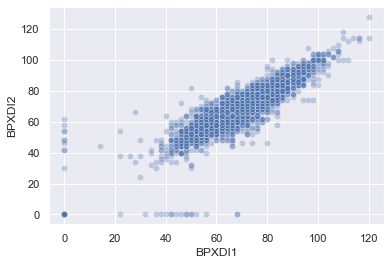

In [30]:
'''
# Question 1
Make a scatterplot showing the relationship between the first and second measurements of diastolic blood pressure (BPXDI1 and BPXDI2). 
Also obtain the 4x4 matrix of correlation coefficients among the first two systolic and the first two diastolic blood pressure measures.
'''
sns.scatterplot(data=da, x="BPXDI1", y="BPXDI2",  alpha=0.3)
# Most of the data is concentrated between 40 and 100 BPXDI1 and between 40 and 100 BPXDI2

df = da.loc[:1, ["BPXDI1", "BPXDI2"]]
df.corr()

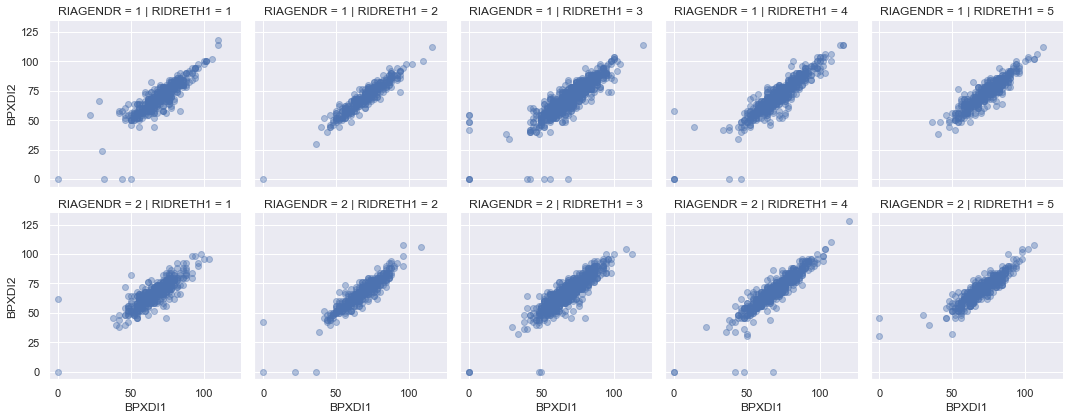

In [31]:
'''
Question 2
Construct a grid of scatterplots between the first systolic and the first diastolic blood pressure measurement.
Stratify the plots by gender (rows) and by race/ethnicity groups (columns).
'''
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})
sns.FacetGrid(da, row="RIAGENDR",  col="RIDRETH1").map(
    plt.scatter, "BPXDI1", "BPXDI2", alpha=0.4).add_legend()

C:\Users\eli\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


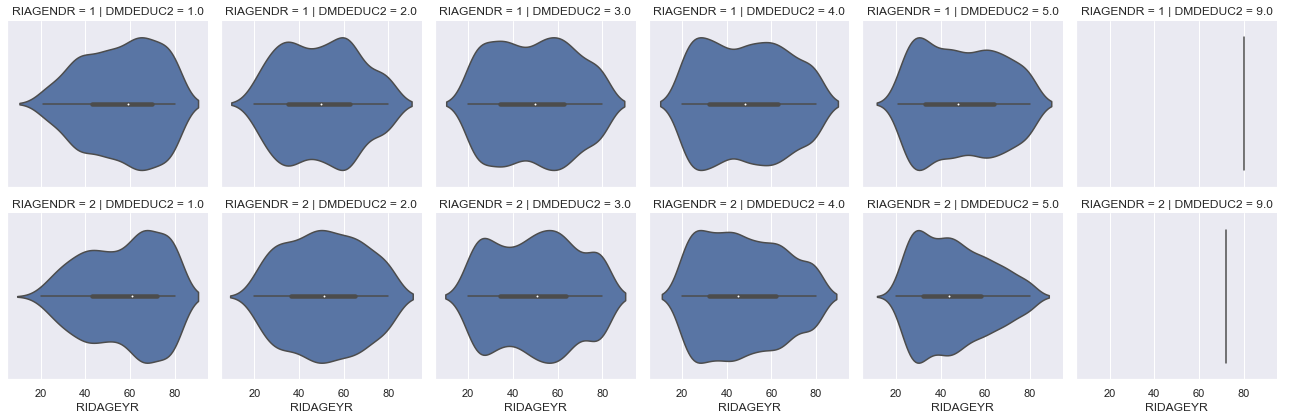

In [32]:
'''
Question 3
Use "violin plots" to compare the distributions of ages within groups defined by gender and educational attainment..
'''
sns.FacetGrid(da, row="RIAGENDR", col="DMDEDUC2").map(
    sns.violinplot, "RIDAGEYR", alpha=0.4).add_legend()

C:\Users\eli\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


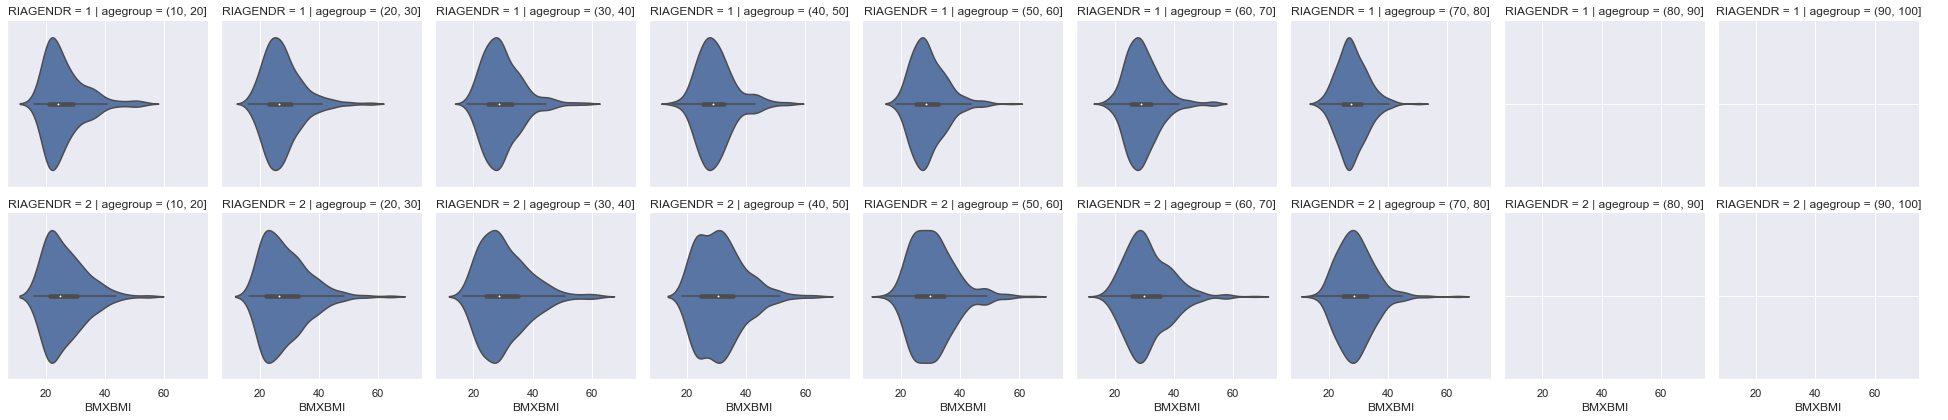

In [33]:
'''
Question 4
Use violin plots to compare the distributions of BMI within a series of 10-year age bands. Also stratify these plots by gender.
'''
da["agegroup"] = pd.cut(da.RIDAGEYR, [10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

sns.FacetGrid(da, row="RIAGENDR", col="agegroup").map(
    sns.violinplot, "BMXBMI", alpha=0.4).add_legend()

In [34]:
'''
Question 5
Construct a frequency table for the joint distribution of ethnicity groups (RIDRETH1) and health-insurance status (HIQ210).
Normalize the results so that the values within each ethnic group are proportions that sum to 1.
'''
x = pd.crosstab(da.RIDRETH1, da.HIQ210)
x.apply(lambda z: z/z.sum(), axis=1)

HIQ210,1.0,2.0,9.0
RIDRETH1,,,
1,0.137982,0.857567,0.004451
2,0.128696,0.871304,0.000000
3,0.067354,0.931432,0.001214
4,0.108654,0.890385,0.000962
5,0.081761,0.915723,0.002516
